<h1><center> Professional Cipher</H1><center>

<img src="Iris.jpg" width="300" height="150">

In [52]:
# Importing libraries in Python

import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import seaborn as sns
import numpy as np

In [4]:
iris = datasets.load_iris()

In [5]:

data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])

In [6]:
data['Species']=iris['target']

In [7]:

data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

In [27]:

data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
data.tail()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


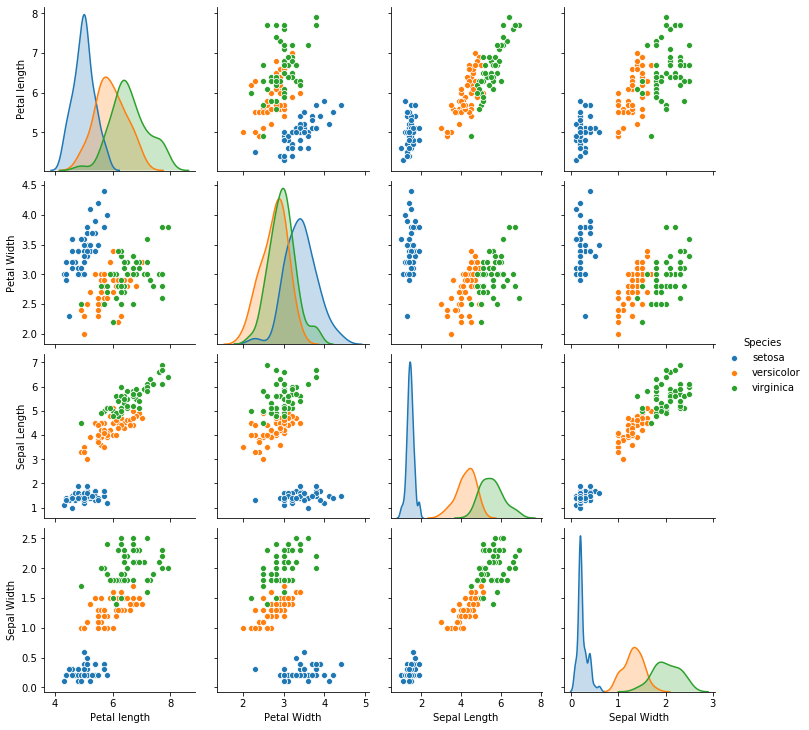

In [9]:
sns.pairplot(data, hue = 'Species')
plt.show()

In [10]:
data.corr()

,Petal length,Petal Width,Sepal Length,Sepal Width
Petal length,1.000000,-0.117570,0.871754,0.817941
Petal Width,-0.117570,1.000000,-0.428440,-0.366126
Sepal Length,0.871754,-0.428440,1.000000,0.962865
Sepal Width,0.817941,-0.366126,0.962865,1.000000


[]

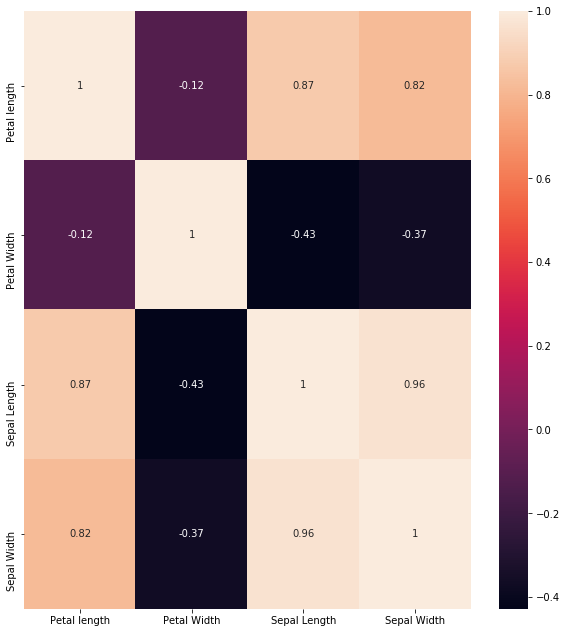

In [11]:

plt.figure(figsize=(10,11))
sns.heatmap(data.corr(),annot=True)
plt.plot()

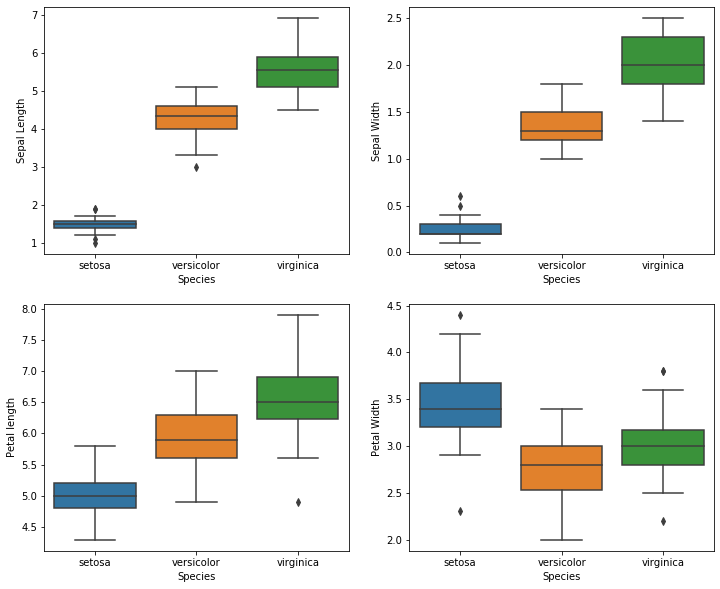

In [12]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="Sepal Length",data=data)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="Sepal Width",data=data)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="Petal length",data=data)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="Petal Width",data=data)

In [13]:

from sklearn.model_selection import train_test_split
data.columns

Index(['Petal length', 'Petal Width', 'Sepal Length', 'Sepal Width',
       'Species'],
      dtype='object')

In [14]:
y = data.Species
features = ['Petal length', 'Petal Width', 'Sepal Length', 'Sepal Width']
X = data[features].copy()


# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3,
                                                      random_state=0)

In [42]:
X_valid.head()

,Petal length,Petal Width,Sepal Length,Sepal Width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [43]:
y_valid.head()

114     virginica
62     versicolor
33         setosa
107     virginica
7          setosa
Name: Species, dtype: object

In [41]:
from sklearn.tree import DecisionTreeClassifier

# DT is trained from training data.

DT = DecisionTreeClassifier(random_state=12)
model = DT.fit(X_train, y_train)

In [16]:
pred1 = DT.predict(X_valid)
pred1

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

# Lets see the score

In [17]:
y_valid

114     virginica
62     versicolor
33         setosa
107     virginica
7          setosa
100     virginica
40         setosa
86     versicolor
76     versicolor
71     versicolor
134     virginica
51     versicolor
73     versicolor
54     versicolor
63     versicolor
37         setosa
78     versicolor
90     versicolor
45         setosa
16         setosa
121     virginica
66     versicolor
24         setosa
8          setosa
126     virginica
22         setosa
44         setosa
97     versicolor
93     versicolor
26         setosa
137     virginica
84     versicolor
27         setosa
127     virginica
132     virginica
59     versicolor
18         setosa
83     versicolor
61     versicolor
92     versicolor
112     virginica
2          setosa
141     virginica
43         setosa
10         setosa
Name: Species, dtype: object

In [18]:
DT.predict(X_valid)

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

In [19]:
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_valid , pred1))

Accuracy Score: 0.9777777777777777


<br>
<br>

# VISUALIZING DICISION TREE

In [20]:
!pip install pydotplus

<br>
<br>

# How it works
<br>


<img src="ex.png" width="600" height="400">

<br>
<br>



<img src = "ex2.png" width="700" height="900">

In [26]:
conda install python-graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Hp\anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    python-graphviz-0.15       |     pyhd3eb1b0_0          20 KB
    ------------------------------------------------------------
                                           Total:        29.3 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2
  python-graphviz    pkgs/main/noarch::python-graphviz-0.15-pyhd3eb1b0_0




graphviz-2.38        | 29.3 MB   |            |   0% 
graphviz-2.38        | 29.3 MB   |            |   0% 
graphviz-2.38        | 29.3 MB   |            |   0% 
graphviz-2.38        | 29.3 MB   |            |   0% 
graphviz-2.38        | 29.3 MB   |

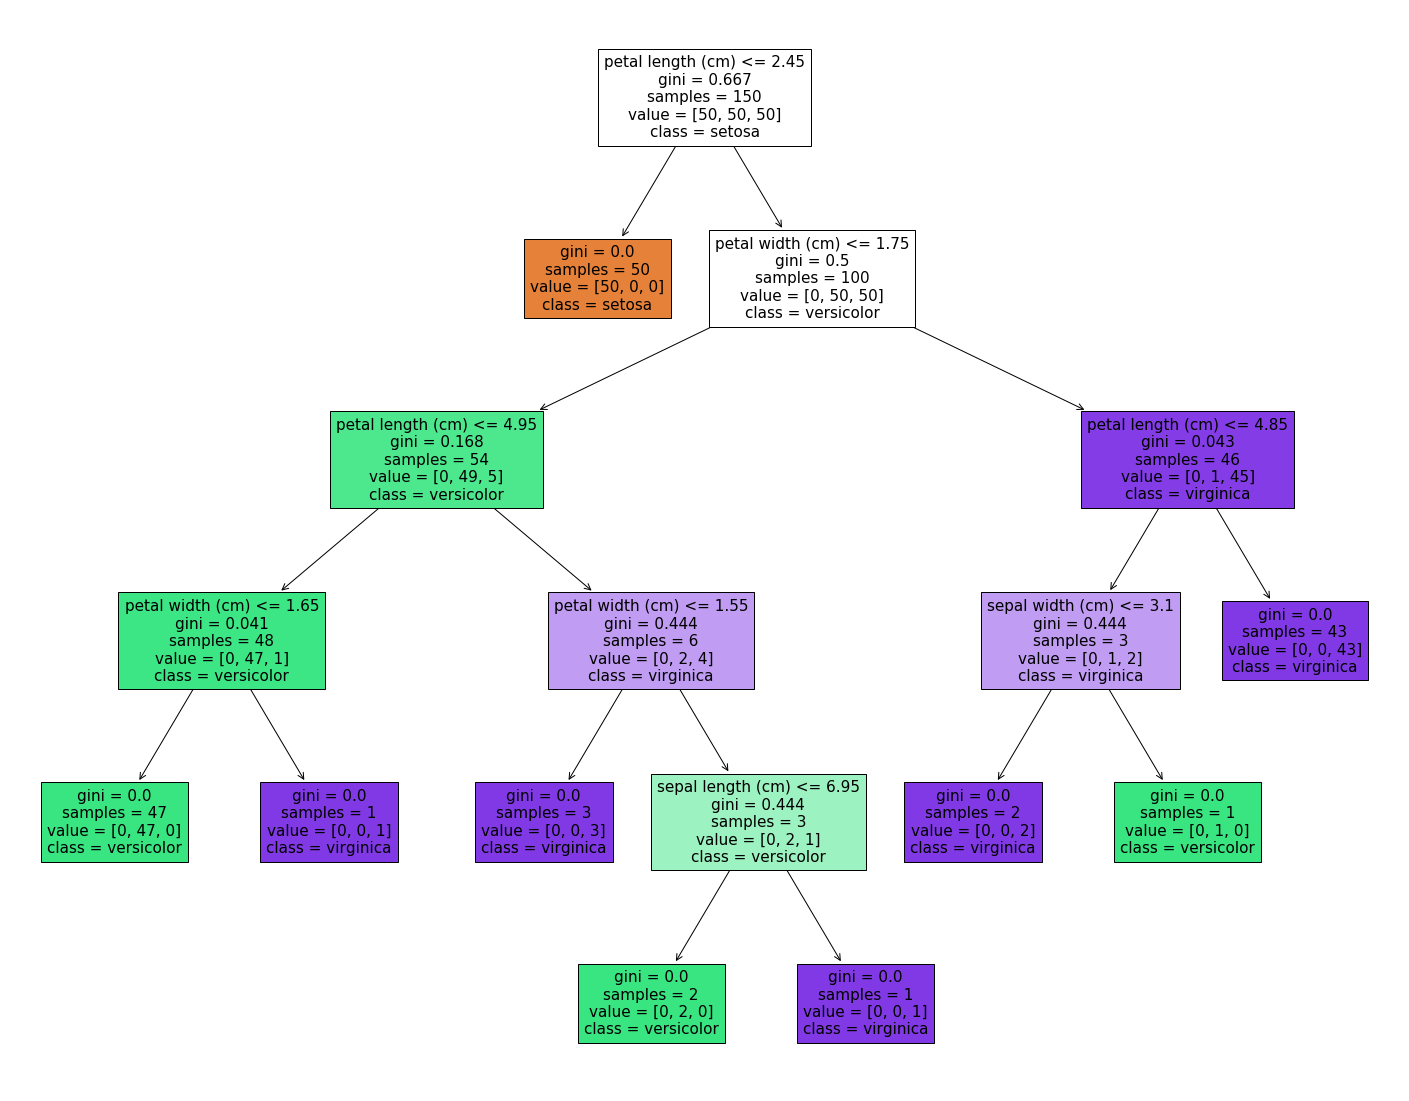

In [37]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
iris = datasets.load_iris()
X = iris.data
y = iris.target
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

 <br>
 <br>
 
 
 # PREDICTING A NEW DATA SET

In [38]:
DT.predict([[3.5, 1.9, 5.2, 2.4]])

array(['virginica'], dtype=object)

In [39]:
# Go to ID - 3

DT.predict([[4.6,3.1,1.5,0.2]])

array(['setosa'], dtype=object)

<br>
<br>


# Lets use test data.

In [45]:
# see 114

DT.predict([[5.8,2.8,5.1,2.4]])

array(['virginica'], dtype=object)

<br>
<br>



# LETS USE RANDOM FOREST

In [60]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
data1 = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()

data1['Species'] = label_encoder.fit_transform(data['Species'])
data1.tail()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [61]:
data['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [63]:
data1['Species'].unique()

array([0, 1, 2])

In [71]:
y1 = data1.Species
features = ['Petal length', 'Petal Width', 'Sepal Length', 'Sepal Width']
X1 = data1[features].copy()



In [72]:
from sklearn.ensemble import RandomForestRegressor
train_X, val_X, train_y, val_y = train_test_split(X1, y1, random_state=1)

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
# Calculate the mean absolute error of your Random Forest model on the validation data
val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 0.02736842105263158


In [76]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train_X,train_y)

y_pred=clf.predict(val_X)

In [77]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(val_y, y_pred))

Accuracy: 0.9736842105263158


In [80]:
#see 145
clf.predict([[6.7,3.0,5.2,2.3]])

array([2])

# As CLF is trained from training data

# lets see its prediction of a single test data

In [81]:
val_X.tail()

,Petal length,Petal Width,Sepal Length,Sepal Width
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4
48,5.3,3.7,1.5,0.2
53,5.5,2.3,4.0,1.3
28,5.2,3.4,1.4,0.2


In [82]:
val_y.tail()

128    2
114    2
48     0
53     1
28     0
Name: Species, dtype: int32

In [84]:
# See col 128

clf.predict([[6.4,2.8,5.6,2.1]])

array([2])

In [86]:
# See col 53
clf.predict([[5,3,4.0,1.3]])

array([1])

<br>
<br>


<h1><center> --- END --- </h1></center>